## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Paths

In [2]:
TRAIN = '../Data/df_train.csv'
TEST = '../Data/df_test.csv'

## Functions

In [3]:
z_score = lambda x : (x-np.mean(x,axis=0))/ np.std(x,axis=0) #code from exercise 5

## Variables and df loading

In [4]:
col = 'tab10' #colour theme

df = pd.read_csv(TRAIN) #training dataframe

attributes = list(df.columns)[:-1] #creates list of column names for later

X = df[attributes].copy() #attributes
y = df['type'].copy() #true values

y_types = {1:'wind_float', 2:'wind_non', 3:'wind_veh', 5:'container', 6:'tableware', 7:'headlamp'}
y_list = y.unique() #'y' values

X_std = z_score(X) #standardizes X as later we see they are on different scales

for i in y_list: #this changes the 'type' to a descriptive word rather than a number
    #This is more human readable for plotting later - 'y' is still using the numbers
    df['type'][df['type'] == i] = y_types[i]

<ipython-input-4-3bb2aecc6c37>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][df['type'] == i] = y_types[i]


In [29]:
def Gini(df, y,threshold):
    '''Takes a threshold and calc the Gini impurity of each split of the given df'''
    df = pd.concat([df,y], axis=1,)
    df.columns=['Att', 'class']
    #print(df.head())
    
    df_a = df[df['Att'] < threshold]
    df_b = df[df['Att'] >= threshold]
    #calc and return gini impurity for each side
    #print(len(df_a))
    #print(len(df_b))
    gini_a = 0
    gini_b = 0
    
    for i in y_list: #loop through all classes
        
        k_a = df_a[df_a['class'] == i] 
        p_ka = len(k_a)/len(df_a) #count number of class k in first split, divided by total in that split.
        
        k_b = df_b[df_b['class'] == i]
        p_kb = len(k_b)/len(df_b) #count number of class k in first split, divided by total in that split.
        
        #print(i, k_a,k_b)
        
        gini_a += (p_ka* (1-p_ka)) #p*(1-p)
        gini_b += (p_kb* (1-p_kb)) #p*(1-p)
        

    #print(round(gini_a, 3), round(gini_b, 3)) #The leaves gini scores are correct!
    
    return ((len(df_a)/len(df))*gini_a) + ((len(df_b)/len(df))*gini_b) #but this aint.

        
        
Gini(df['Ba'],y, 0.4) #0.736

0.6199065196548418

In [26]:
((128/149) * 0.679) + ((21/149) * 0.259)

0.6198053691275168

In [7]:
def leaf_hunter(df=df, class_list=y_list):
    '''takes df and class returns highest gini gain, best class, best threshold, and 
    best attribute'''
    #So many loops! 
    best_gini = 0
    best_class = ''
    best_threshold = ''
    best_att = ''

    for a in attributes:
        tmp = df.sort_values(by=a, axis=0).copy()
            #print(a)
            #loop through attributes
        for threshold in range(len(df)-1):
            '''loop through potential thresholds'''
            if tmp[a].iloc[threshold] == tmp[a].iloc[threshold+1]:
                pass
            else:
                thresh = ((tmp[a].iloc[threshold] + tmp[a].iloc[threshold+1])/2)
                #print((tmp[a].iloc[threshold], tmp[a].iloc[threshold+1]), thresh)       
                gini = Gini(df[a], y, thresh)
                if a == 'Ba':
                    print(gini, a, thresh)
                if gini > best_gini:
                    best_gini = gini
                    #best_class = cl
                    best_threshold = thresh
                    best_att = a
    return best_gini, best_threshold, best_att
            
best_gini, best_threshold, best_att = leaf_hunter()

print(best_gini, best_threshold, best_att)

0.645428560635632 Ba 0.03
0.641086815327993 Ba 0.075
0.6360268456375838 Ba 0.115
0.6301638250864979 Ba 0.14500000000000002
0.6270147439623738 Ba 0.21000000000000002
0.6199065196548418 Ba 0.4
0.6283023776078248 Ba 0.535
0.6365459337554005 Ba 0.55
0.6446368495653807 Ba 0.585
0.6525739032647838 Ba 0.625
0.6603547459252157 Ba 0.65
0.6679755584493641 Ba 0.675
0.660906928021022 Ba 0.875
0.6685368520149412 Ba 1.125
0.6760152843776026 Ba 1.285
0.6833346596988266 Ba 1.4649999999999999
0.6904833180435517 Ba 1.56
0.7041863011090486 Ba 1.58
0.7106666846717892 Ba 1.6099999999999999
0.7168066832496363 Ba 1.65
0.7224645786726324 Ba 1.6749999999999998
0.7273547789863458 Ba 1.6949999999999998
0.7308081272409671 Ba 1.955
0.7318175592384606 Ba 2.54
0.7318157083257755 Ba 3.0149999999999997
0.7349420223030549 1.52203 RI


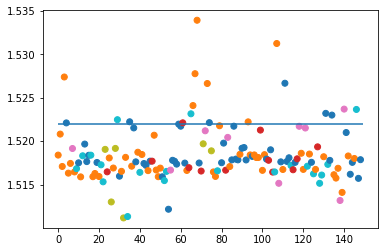

In [8]:
plt.scatter([i for i in range(149)], df[best_att], c=y, cmap=col)
plt.hlines(best_threshold, 0, 149);

In [30]:
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(X, y)

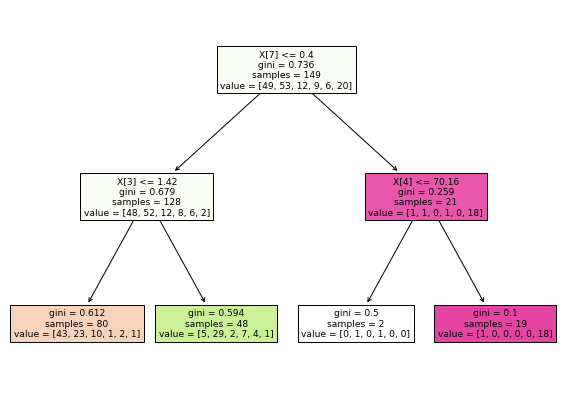

In [31]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(model, filled= True)

In [11]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.0,0.17
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.0,0.00


In [12]:
for a in attributes:
    print(a, len(X[X[a] < 0.4]))

RI 0
Na 0
Mg 29
Al 2
Si 0
K 54
Ca 0
Ba 128
Fe 149


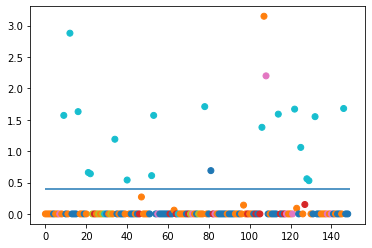

In [13]:
plt.scatter([i for i in range(149)], df['Ba'], c=y, cmap=col)
plt.hlines(0.4, 0, 149);

In [18]:
print(len(X[X['Ba'] < 0.4]), len(X[X['Ba'] >= 0.4]))

128 21
